In [1]:
import numpy as np 

np.random.seed(0)
# ,[1, 2, 3, 2.5,1],[1, 2, 3, 2.5,1]

# X = [[1, 2, 3, 2.5,1]]

# X= np.reshape(X,(5,1))
# y_a = np.array([1,3,4,2,6])
# y_a= np.reshape(y_a,(1,5))
# y_a
c= np.ones(10,dtype=int)
a = np.random.randint(1,10,10,dtype=int)
b = np.random.randint(1,10,10,dtype=int)
x= np.vstack((c,a,b))
x.shape
# 

(3, 10)

In [2]:
th = np.array([5,2,3])
th=np.reshape(th,(1,3))
th.shape
y = np.dot(th,np.square(x))
y.shape

(1, 10)

In [3]:
## Building neural network from scratch

## Forward pass
class Layer_Dense:
    ## initializing weights
    def __init__(self, n_neurons, n_inputs):
        self.weights = 0.10 * np.random.randn(n_neurons, n_inputs)
#         self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.matmul( self.weights , inputs) 

 ## assiging weights after back prop       
class BackProp: 
    ##layer wise back prop
    
    def backprop_l3(self,a2,a3 , w3):
        a2 = np.reshape(a2,(a2.shape[0],1))
        # print(a2.shape)
        a3 = np.reshape(a3,(a3.shape[0],1))
        w3 -=  (0.001/10)  * (1-np.sum(np.square(a3))) * np.matmul(np.ones((1,4)),a2)
        return w3
    
    def backprop_l2(self,w3, w2,a2,a1,a3):
        a2 = np.reshape(a2,(a2.shape[0],1))
        a1 = np.reshape(a1,(a1.shape[0],1))
        w2 -= (0.001/10)*(1-np.sum(np.square(a3)))*np.matmul(w3,np.ones((4,1)))*np.matmul(a2,a1.T)
        return w2
    
    def backprop_l1(self, w1,w2,w3,x,a1,a2,a3):
        a2 = np.reshape(a2,(a2.shape[0],1))
        # a3 = np.reshape(a3,(a3.shape[0],1))
        a1 = np.reshape(a1,(a1.shape[0],1))
        
        w1 -= ((0.001/10)*(1-np.sum(np.square(a3)))* (np.sum(w2)))*np.matmul(np.matmul(a1,a2.T),np.matmul(x,w3).T) 
        return w1
        
## Defining activation layer relu
class ActivationRelu:
    def __init__(self, inputs):
        self.output= np.maximum(0,inputs)

## Defining activation layer tanh
class ActivationTanh:
    def __init__(self, inputs):
        self.output= np.tanh(inputs)

## Defining soft max
class Activation_softmax:
    def __init__(self,inputs):
        expV = np.exp(inputs - np.max(inputs,keepdims=True, axis=1) )
        probabity = expV/np.sum(expV,keepdims=True, axis=1)
        self.output= probabity

## Parent class of loss
class Loss:
    def calculate (self, ot,y):
        samples =self.forward(ot,y)
        return np.mean(samples)

## Mean squared error
class MSE(Loss) :
    def forward(self, yhat,y):
        return (np.square(yhat-y))

## Cross entropy loss 
class CrossEntropy(Loss):
    def forward(self, y_p, y_a):
        sample = len(y_p)
        y_p = np.clip(y_p,1e-7,1-1e-7)
        if(len(y_p.shape) == 1):
            correct_config =  y_p[range(sample),y_a]
        elif(len(y_p.shape) == 2):
            correct_config =  np.sum(y_p*y_a, axis=1)
        return (-np.log(correct_config))    
        
size = x.shape[0] # 3
## Desiging NN
layer1 = Layer_Dense(3,3)
layer2 = Layer_Dense(4,3)
layer3 = Layer_Dense(1,4)
##Backpropagation
back_prop = BackProp()
# # layer4 = Layer_Dense(1,2)


In [4]:
## training 
cost=[]
## number of epoch
for i in range(100):
    yhat=[]
    for j in range(x.shape[1]):
        ## taking indiviual training set from the batch
        xn = x[:,j]
        xn= np.reshape(xn,(xn.shape[0],1))
        
        layer1.forward(xn)
        o1= layer1.output
        ao1=ActivationTanh(o1)
        layer2.forward(ao1.output)
        o2= layer2.output
        ao2 = ActivationTanh(o2)
        # print(ao2.output.shape,"l2")
        # print(ao2.output.shape)
        layer3.forward(ao2.output)
        o3= layer3.output
        # ao3 = ActivationRelu(o3)
        # layer4.forward(ao3.output)
        # o4= layer4.output
        # ao4 = ActivationRelu(o4)
        # prob = Activation_softmax(o3)
        ao3 = ActivationTanh(o3)
        # print(ao3.output.shape,"l3")
        yhat.append(ao3.output)
        # loss = CrossEntropy()
        
        ##Back propagation

        # print(layer3.weights , "old")
        layer3.weights = back_prop.backprop_l3(ao2.output,ao3.output,layer3.weights)
        # print(layer3.weights)
        # print(layer2.weights)
        layer2.weights = back_prop.backprop_l2(layer3.weights,layer2.weights,ao2.output,ao1.output,ao3.output)
        # print(layer2.weights)
        # print(layer1.weights)
        layer1.weights = back_prop.backprop_l1(layer1.weights,layer2.weights,layer3.weights,xn,ao1.output,ao2.output,ao3.output)
        # print(layer1.weights)
        
    loss= MSE()
    yhat = np.reshape(yhat,(1,y.shape[1]))
    l=loss.calculate(yhat,y)
    cost.append(l)
    # print(ao4.output.shape)
    # print(prob.output,"softmax")
# print(l)

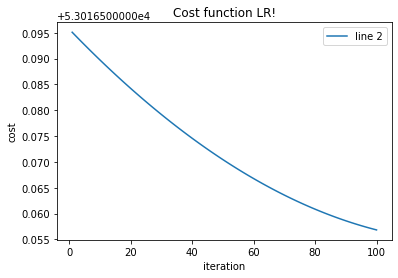

In [5]:
from matplotlib import pyplot as plt 
l=np.arange(1,len(cost)+1)
plt.plot(l, cost, label = "line 2")
  
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('cost')
# giving a title to my graph
plt.title('Cost function LR!')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [6]:
# Finding derivative ofnn for back propagation using tanh
import scipy as sp
import sympy as smp
from sympy import * 
from scipy.misc import derivative

In [7]:
w1,w2,w3,x,y = smp.symbols('w1 w2 w3 x y',real=True)
l1=smp.tanh(x * w1)
l2=smp.tanh(l1 * w2)
f= smp.tanh(l2*w3)-y

In [8]:
dldw3= smp.diff(f,w3)
dldw3

(1 - tanh(w3*tanh(w2*tanh(w1*x)))**2)*tanh(w2*tanh(w1*x))

In [9]:
dldw2  = smp.diff(f,w2)
dldw2

w3*(1 - tanh(w2*tanh(w1*x))**2)*(1 - tanh(w3*tanh(w2*tanh(w1*x)))**2)*tanh(w1*x)

In [10]:
dldw1 = smp.diff(f,w1)
dldw1

w2*w3*x*(1 - tanh(w1*x)**2)*(1 - tanh(w2*tanh(w1*x))**2)*(1 - tanh(w3*tanh(w2*tanh(w1*x)))**2)

In [ ]:
w1,w2,w3,x,y = smp.symbols('w1 w2 w3 x y',real=True)
l1=smp.Piecewise(((x * w1), (x*w1)>=0),(0,(x*w1)<0))
l2=smp.Piecewise(((l1 * w2), (l1*w2)>=0),(0,(l1*w2)<0))
f= smp.Piecewise(((l2*w3),(l2*w3)>=0),(0,(l2*w3)<0))-y

In [ ]:
a= 0.001 * ao2.output
a = np.matmul(ao2.output.T , ao2.output) 
a.shape

In [ ]:

# layer1.forward(X)
# o1= layer1.output
# ao1=ActivationTanh(o1)
# # print(ao1.output,"l1")
# # print(layer1.output)
# layer2.forward(ao1.output)
# o2= layer2.output
# ao2 = ActivationTanh(o2)
# # print(ao2.output,"l2")
# layer3.forward(ao2.output)
# o3= layer3.output
# # ao3 = ActivationRelu(o3)
# # print(ao3.output,"l3")
# # layer4.forward(ao3.output)
# # o4= layer4.output
# # ao4 = ActivationRelu(o4)
# prob = Activation_softmax(o3)
# loss = CrossEntropy()
# l=loss.calculate(prob.output,y_a)

# ##Back propagation

# print(layer3.weights)
# layer3.weights = layer3.backprop_l3(ao2,layer3.weights)
# print(layer3.weights)
# print(layer2.weights)
# layer2.weights = layer2.backprop_l2(layer3.weights,layer2.weights,ao2,ao1)
# print(layer2.weights)
# print(layer1.weights)
# layer1.weights = layer1.backprop_l1(layer1.weights,layer2.weights,layer3.weights,X,ao1,ao2)
# print(layer1.weights)


# # print(ao4.output.shape)
# # print(prob.output,"softmax")
# print(l)